In [2]:
# No Colab alterar o tipo de ambiente de execução para a versão 3.11 do python para funcionar o pycaret (atualmente o Colab utiliza a versão 3.12)
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Estação metereológica MONTE ALEGRE**

*   **Nome:** Monte Alegre
*   **Tipo:** Meteorológica automática
*   **Data da instalação:** 21/06/2011
*   **Local da instalação:** Fazenda Monte Alegre
*   **Bacia:** Bacia do Ribeirão da Onça
*   **Latitude:** 22°11'19" S
*   **Longitude:** 47°57'12" O
*   **Altitude:** 752
*   **Cobertura do solo:** Pasto

## 1. Coleta de Dados

Esse dataset possui as leituras automáticas realizadas no período de **21/06/2011 à 16/12/2024**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo no Google Drive
caminho_arquivo = "/content/drive/MyDrive/datasets/dado_estacao_monte_alegre.csv"

# Lendo o conjunto de dados
df = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)

# Criando variáveis de data, precipitação e temperatura
variavel_data = 'data_hora_leitura'
variavel_precipitacao = 'precipitacao_total'
variavel_temperatura = 'temperatura_do_ar'

# Converte a coluna de datas para o tipo datetime
df[variavel_data] = pd.to_datetime(df[variavel_data], errors="coerce")

# Ordena por data
df = df.sort_values(variavel_data)

df

/tmp/ipython-input-2-2009579332.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)


,id_da_estacao,data_hora_leitura,temperatura_painel,pressao_media,precipitacao_total,temperatura_do_ar,umidade_relativa,radiacao_media,fluxo_radiacao_total,velocidade_do_vento,direcao_do_vento,bateria,precipitacao_nao_corrigida
id,,,,,,,,,,,,,
1,0.0,2011-06-21 16:00:00,NaN,NaN,0.6,27.13,42.23,0.330,0.446000,0.745,278.30,13.22,0.6
2,1.0,2011-06-21 17:00:00,NaN,NaN,0.0,26.41,55.17,0.210,0.769000,0.260,274.30,13.23,0.0
3,2.0,2011-06-21 18:00:00,NaN,NaN,0.0,21.96,74.57,0.020,0.073000,0.698,222.20,13.04,0.0
4,3.0,2011-06-21 19:00:00,NaN,NaN,0.0,19.47,76.40,0.000,0.000000,0.473,222.80,13.00,0.0
5,4.0,2011-06-21 20:00:00,NaN,NaN,0.0,17.20,82.61,0.000,0.000000,0.412,221.90,12.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019527,NaN,2025-08-28 12:00:00,32.53,863.0,0.0,27.59,38.28,0.834,0.150075,1.055,113.10,13.02,NaN
1019528,NaN,2025-08-28 12:30:00,33.70,790.7,0.0,28.41,33.93,0.842,0.075811,1.577,73.31,13.01,NaN
1019529,NaN,2025-08-28 13:40:00,34.47,862.0,0.0,29.78,27.72,0.785,0.141248,0.860,354.40,13.02,NaN


## 2. Dicionário e estrutura do conjunto de dados

Nesse banco de dados existem **13 variáveis** sendo uma do tipo datetime e 12 numéricas, com **589200 leituras**, nas quais são:

* **id_da_estacao:** identificação da leitura
* **data_hora_leitura:** data e hora da leitura
* **temperatura_painel:** temperatura no painel
* **pressao_media:** pressão média em milibar (mbar)
* **precipitacao_total:** precipitação em milímetros (mm)
* **temperatura_do_ar:** temperatura do ar em graus celsius (C)
* **umidade_relativa:** umidade relativa em porcentagem (%)
* **radiacao_media:** radiação média em kW/m^2
* **fluxo_radiacao_total:** fluxo da radiação em MJ/m^2
* **velocidade_do_vento:** velocidade do vento em metros/segundo
* **direcao_do_vento:** direção do vento em graus
* **bateria:** Voltagem da bateria em volts (V)
* **precipitacao_nao_corrigida**

**Importante:** há períodos com leituras diárias e períodos com leituras de 10 em 10 minutos.

## 3. Análise descritiva univariada das variáveis

In [3]:
# Dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{df.shape[1]} \Leituras: \t{df.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	13 \Leituras: 	748302



In [4]:
# Tipos de cada variável
df.dtypes

,0
id_da_estacao,float64
data_hora_leitura,datetime64[ns]
temperatura_painel,float64
pressao_media,float64
precipitacao_total,float64
temperatura_do_ar,float64
umidade_relativa,float64
radiacao_media,float64
fluxo_radiacao_total,float64
velocidade_do_vento,float64


In [5]:
# Dados ausentes
df.isnull().sum()

,0
id_da_estacao,513115
data_hora_leitura,0
temperatura_painel,38094
pressao_media,38095
precipitacao_total,404
temperatura_do_ar,529
umidade_relativa,530
radiacao_media,7
fluxo_radiacao_total,7
velocidade_do_vento,7


In [6]:
df.describe()

,id_da_estacao,data_hora_leitura,temperatura_painel,pressao_media,precipitacao_total,temperatura_do_ar,umidade_relativa,radiacao_media,fluxo_radiacao_total,velocidade_do_vento,direcao_do_vento,bateria,precipitacao_nao_corrigida
count,235187.000000,748302,710208.000000,710207.000000,747898.000000,747773.000000,747772.000000,748295.000000,748295.000000,748295.000000,748295.000000,748294.000000,97288.000000
mean,51410.942267,2020-10-09 03:24:01.566104576,22.203507,930.975624,0.031624,20.082910,71.221580,0.205385,0.250508,1.534050,170.277623,12.727531,0.072638
min,0.000000,2011-06-21 16:00:00,-2.402000,402.100000,0.000000,-104.400000,-85.600000,0.000000,0.000000,0.000000,0.000000,8.870000,0.000000
25%,19602.000000,2018-09-05 04:52:30,17.540000,929.000000,0.000000,17.570000,55.440000,0.000000,0.000000,0.557000,79.150000,12.450000,0.000000
50%,40053.000000,2021-03-19 11:30:00,21.220000,931.000000,0.000000,20.990000,77.120000,0.002000,0.001787,1.280000,160.600000,12.620000,0.000000
75%,80080.500000,2023-03-23 20:47:30,27.470000,933.000000,0.000000,25.150000,91.900000,0.377000,0.243066,2.301000,268.300000,13.100000,0.000000
max,138913.000000,2025-09-01 11:50:00,42.670000,943.000000,47.400000,66.660000,150.500000,1.434000,59.700000,9.840000,691.200000,13.940000,47.400000
std,39021.270698,NaN,6.903889,4.638414,0.401709,10.333988,25.591746,0.296500,2.438477,1.211119,108.967796,0.414409,0.726413


In [7]:
# Removendo variáveis desnecessárias
df.drop(['id_da_estacao', 'precipitacao_nao_corrigida', 'bateria'], axis=1, inplace=True)

In [8]:
# Agregação dos valores de 10 em 10 minutos para diário
df_10min = df.set_index(variavel_data).resample('10min').mean()

df_diario = df_10min.resample('D').agg({
    'temperatura_painel': 'mean',
    'pressao_media': 'mean',
    'precipitacao_total': 'sum',
    'temperatura_do_ar': 'mean',
    'umidade_relativa': 'mean',
    'radiacao_media': 'mean',
    'fluxo_radiacao_total': 'mean',
    'velocidade_do_vento': 'mean',
    'direcao_do_vento': 'mean',
})

In [9]:
# Define a precipitação como NaN se a temperatura também for NaN, ou seja, não houve leitura naquele dia
df_diario.loc[df_diario[variavel_temperatura].isna(), variavel_precipitacao] = np.nan

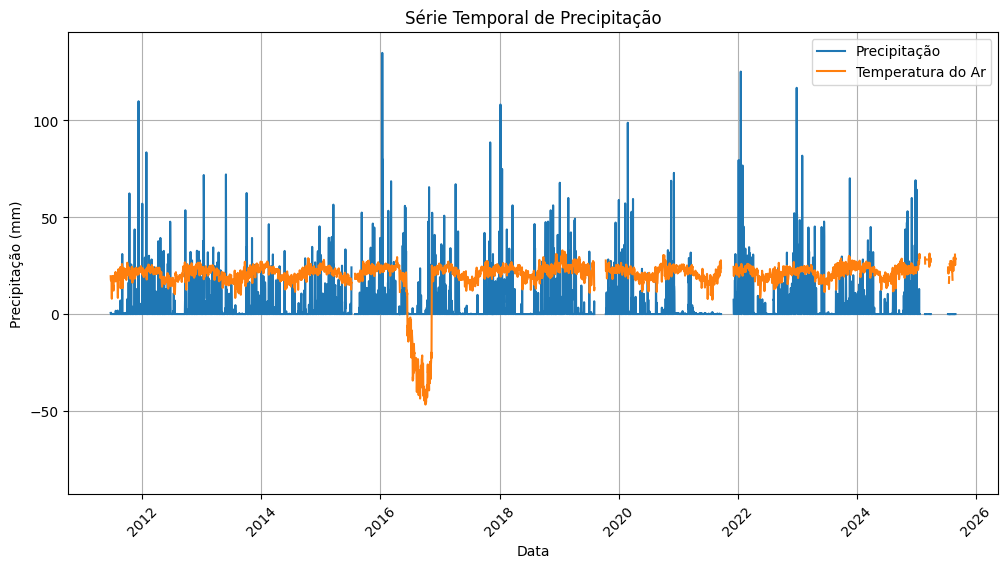

In [10]:
# Gráfico com leituras diárias de precipitação e temperatura
plt.figure(figsize=(12,6))
plt.plot(df_diario.index, df_diario[variavel_precipitacao], label='Precipitação')
plt.plot(df_diario.index, df_diario[variavel_temperatura], label='Temperatura do Ar')

# Adiciona título e rótulos
plt.title('Série Temporal de Precipitação')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

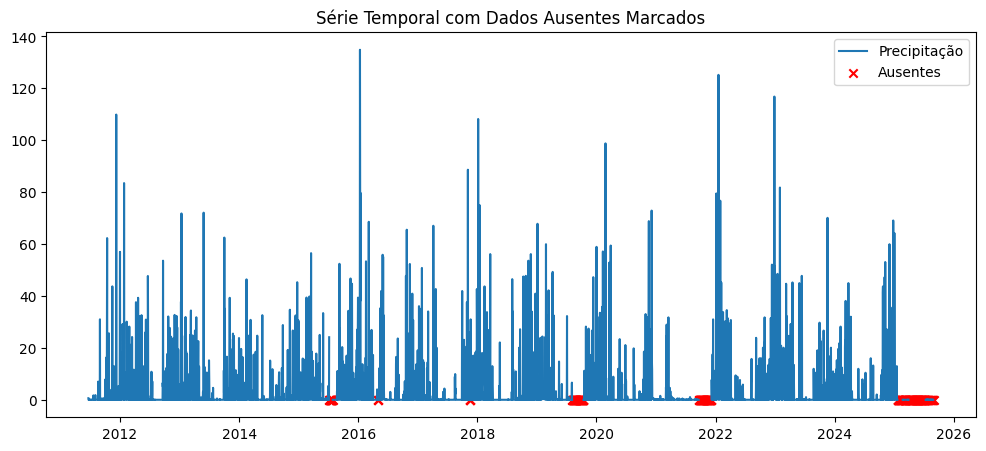

In [11]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(df_diario.index, df_diario[variavel_precipitacao], label='Precipitação')
plt.scatter(df_diario.index[df_diario[variavel_precipitacao].isna()], [0]*df_diario[variavel_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal com Dados Ausentes Marcados')
plt.show()



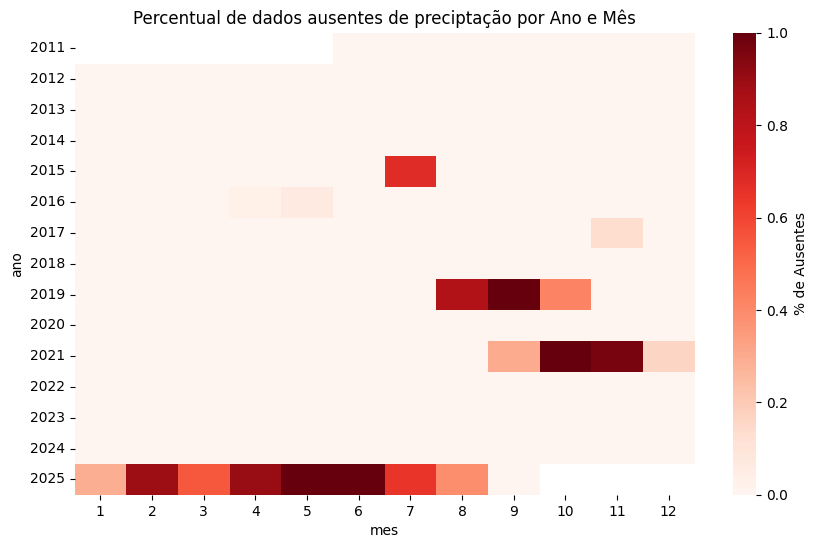

In [12]:
# Cria tabela ano x mês, contando valores ausentes
df_diario['ano'] = df_diario.index.year
df_diario['mes'] = df_diario.index.month
pivot = df_diario.pivot_table(values=variavel_precipitacao, index='ano', columns='mes',
                       aggfunc=lambda x: x.isna().mean())

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', cbar_kws={'label': '% de Ausentes'})
plt.title('Percentual de dados ausentes de preciptação por Ano e Mês')
plt.show()


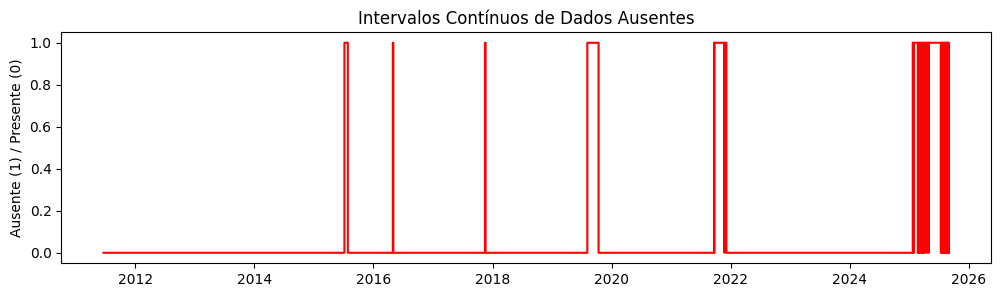

In [13]:
is_na = df_diario[variavel_precipitacao].isna()
plt.figure(figsize=(12,3))
plt.plot(df_diario.index, is_na, drawstyle='steps-mid', color='red')
plt.title('Intervalos Contínuos de Dados Ausentes')
plt.ylabel('Ausente (1) / Presente (0)')
plt.show()


# Preenchimento dos dados faltantes com o cunjunto de dados ERA5


In [14]:
# Dados ERA5
caminho_arquivo = "/content/drive/MyDrive/datasets/serie_tp_lat-22.1886_lon-47.9533_monte_alegre_era5_2015a2025.csv"

df_dados_era5 = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)

# Ordena por data
df_dados_era5 = df_dados_era5.sort_values("valid_time")

df_dados_era5 = df_dados_era5.resample("D").agg({
    "tp": "sum",
    "tp_mm": "sum",
})

# Agregando a precipitação diária para a soma Mensal ('MS' - Month Start)
# A função 'sum()' é usada para somar a precipitação dentro de cada mês
df_dados_era5_mensal = df_dados_era5['tp_mm'].resample('MS').sum().to_frame()

df_dados_era5

,tp,tp_mm
valid_time,,
2015-01-01,1.519144e-03,1.519144
2015-01-02,1.875937e-03,1.875937
2015-01-03,3.991038e-03,3.991038
2015-01-04,8.438468e-03,8.438468
2015-01-05,1.255524e-02,12.555242
...,...,...
2025-10-13,1.434769e-02,14.347687
2025-10-14,3.470421e-03,3.470421
2025-10-15,3.579855e-04,0.357985


In [15]:
df_diario["precipitacao_total"] = df_diario["precipitacao_total"].fillna(df_dados_era5["tp_mm"])

df_diario

,temperatura_painel,pressao_media,precipitacao_total,temperatura_do_ar,umidade_relativa,radiacao_media,fluxo_radiacao_total,velocidade_do_vento,direcao_do_vento,ano,mes
data_hora_leitura,,,,,,,,,,,
2011-06-21,NaN,NaN,0.600000,19.541250,76.343750,0.070000,0.161000,0.360375,243.112500,2011,6
2011-06-22,NaN,NaN,0.000000,17.659167,79.659583,0.210833,0.758875,1.202875,181.554167,2011,6
2011-06-23,NaN,NaN,0.000000,17.305417,83.072083,0.193333,0.698583,0.709333,141.375000,2011,6
2011-06-24,NaN,NaN,0.100000,17.603333,81.207083,0.213333,0.767583,0.684750,195.183333,2011,6
2011-06-25,NaN,NaN,0.100000,18.230833,79.951250,0.204167,0.733500,0.876125,191.625000,2011,6
...,...,...,...,...,...,...,...,...,...,...,...
2025-08-28,33.566667,838.566667,0.000000,28.593333,33.310000,0.820333,0.122378,1.164000,180.270000,2025,8
2025-08-29,NaN,NaN,2.083510,NaN,NaN,NaN,NaN,NaN,NaN,2025,8
2025-08-30,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2025,8


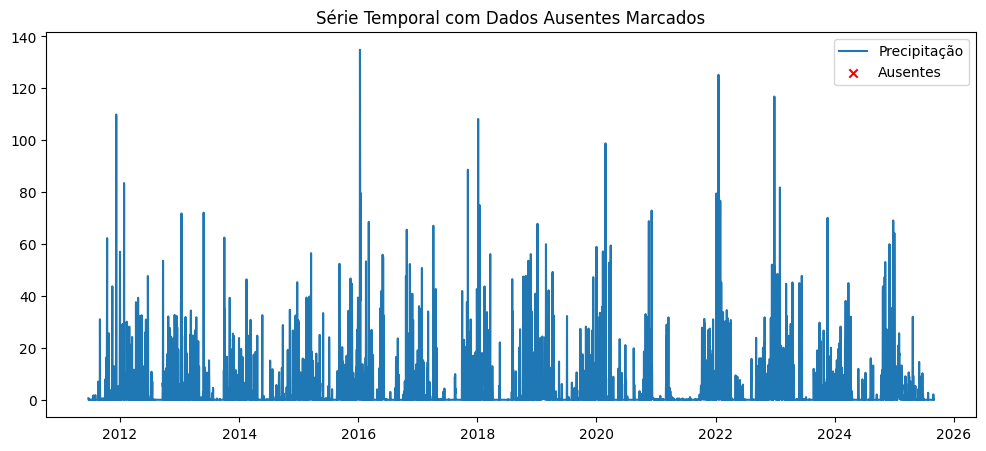

In [16]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(df_diario.index, df_diario[variavel_precipitacao], label='Precipitação')
plt.scatter(df_diario.index[df_diario[variavel_precipitacao].isna()], [0]*df_diario[variavel_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal com Dados Ausentes Marcados')
plt.show()

# Previsão futura

In [17]:
# Agregando a precipitação diária para a soma Mensal ('MS' - Month Start)
# A função 'sum()' é usada para somar a precipitação dentro de cada mês
df_mensal = df_diario[variavel_precipitacao].resample('MS').sum().to_frame()

df_mensal

,precipitacao_total
data_hora_leitura,
2011-06-01,1.000000
2011-07-01,1.900000
2011-08-01,41.500000
2011-09-01,1.300000
2011-10-01,158.100000
...,...
2025-05-01,13.997406
2025-06-01,52.735642
2025-07-01,3.101975


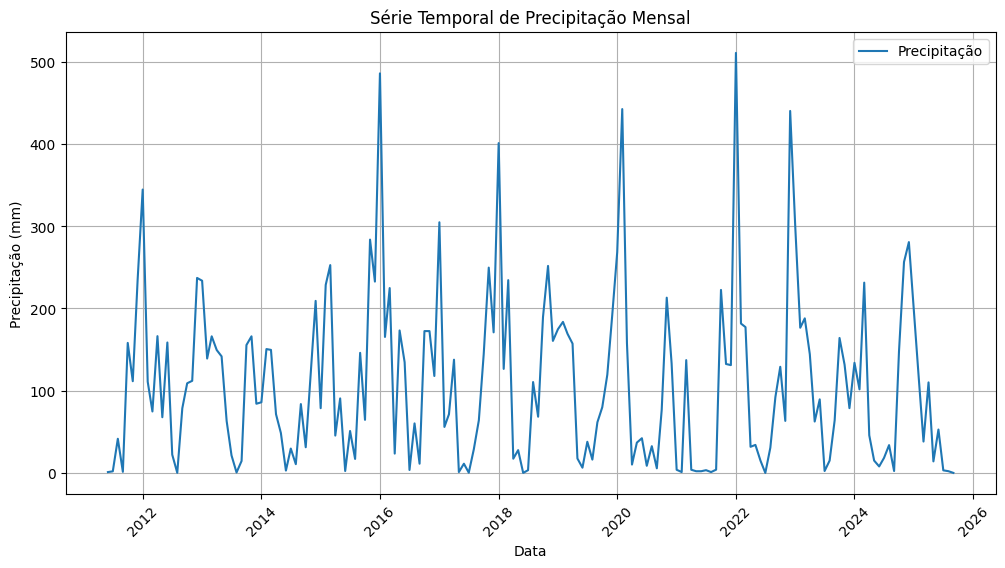

In [18]:
# Cria o gráfico de precipitação mensal
plt.figure(figsize=(12,6))
plt.plot(df_mensal.index, df_mensal[variavel_precipitacao], label="Precipitação")

# Adiciona título e rótulos
plt.title("Série Temporal de Precipitação Mensal")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

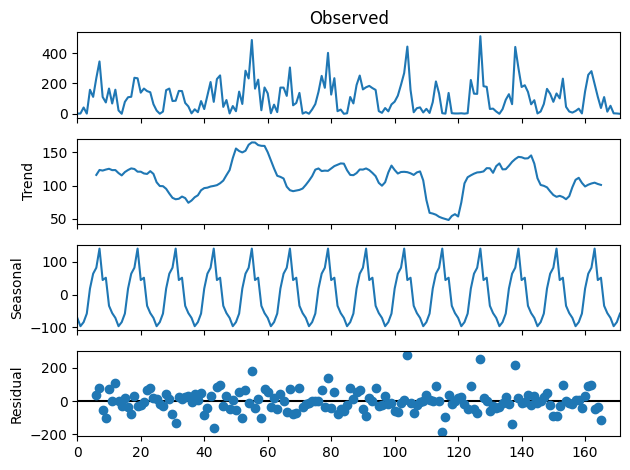

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

precipitacao_total = np.array(df_mensal[variavel_precipitacao])

result = seasonal_decompose(precipitacao_total, model='additive', period=12)
result.plot()

plt.show()

## 3. Previsão Futura para 1 ano

In [29]:
# Definir intervalo para modelagem
inicio = "2011-06-21"
fim    = "2023-12-31"

df_modelagem = df_mensal.copy().loc[inicio:fim]

df_dados_reais_futuro = df_dados_era5_mensal.copy().loc[fim:]

In [30]:
df_dados_reais_futuro

,tp_mm
valid_time,
2024-01-01,126.948461
2024-02-01,159.512341
2024-03-01,184.731067
2024-04-01,20.354033
2024-05-01,27.496561
2024-06-01,1.260094
2024-07-01,19.714594
2024-08-01,26.041709
2024-09-01,13.207994


In [31]:
from pycaret.time_series import setup, compare_models, finalize_model, predict_model

# --- Configuração do PyCaret ---
# Inicializando o ambiente com os dados Mensais
# fh=24: Horizon of the forecast (24 meses, equivalente a dois anos)
print("\nIniciando a Configuração do PyCaret (Dados Mensais)...")
s_mensal = setup(
    data = df_modelagem,
    target = variavel_precipitacao,
    fh = 24,
    session_id = 456,
    #ignore_prep_pipeline = True,
    #verbose = False
)

# --- Comparação e Seleção do Melhor Modelo (Mensal) ---
print("Comparando Modelos (Mensal)...")
# Usando 'seasonal_decompose' para tentar melhorar a decomposição sazonal
best_model_mensal = compare_models(
    fold = 3,
    round = 4, # Maior precisão na comparação
    #verbose = False
)

print(f"\n--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: {type(best_model_mensal).__name__} ---")

# --- Treinamento e Finalização do Melhor Modelo ---
final_model_mensal = finalize_model(best_model_mensal)

# --- Previsão Futura (Forecast) ---
# Gerando a previsão para 24 meses
predictions_mensal = predict_model(final_model_mensal)




Iniciando a Configuração do PyCaret (Dados Mensais)...


,Description,Value
0,session_id,456
1,Target,precipitacao_total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(150, 1)"
5,Transformed data shape,"(150, 1)"
6,Transformed train set shape,"(126, 1)"
7,Transformed test set shape,"(24, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Comparando Modelos (Mensal)...


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.9045,0.9559,57.1398,80.3042,2927988901511278.5000,0.7801,0.4315,1.2967
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9156,0.9601,57.8171,80.8095,3912378067042076.5000,0.8146,0.4244,1.6467
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.9416,0.9633,59.6177,81.2109,4086848910971196.0000,0.7845,0.4172,0.7600
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.9500,0.9837,60.1980,82.7230,4128777399767965.5000,0.7792,0.3971,0.7033
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.9500,0.9837,60.1979,82.7230,4128791325749882.0000,0.7792,0.3971,0.6867
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.9501,0.9839,60.2018,82.7409,4128921662785458.0000,0.7793,0.3968,0.8833
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.9501,0.9838,60.2000,82.7314,4128808825327192.5000,0.7792,0.3969,1.1300
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9501,0.9839,60.2018,82.7409,4128920438868826.5000,0.7793,0.3968,0.6800
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9528,1.0025,60.4346,84.7141,4423786031497312.0000,0.8392,0.3704,0.7833
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.9537,0.9924,60.4130,83.6214,3245479038948782.5000,0.7978,0.3844,1.9733


Processing:   0%|          | 0/117 [00:00<?, ?it/s]


--- O Melhor Modelo Selecionado pelo PyCaret (Mensal) é: BaseCdsDtForecaster ---


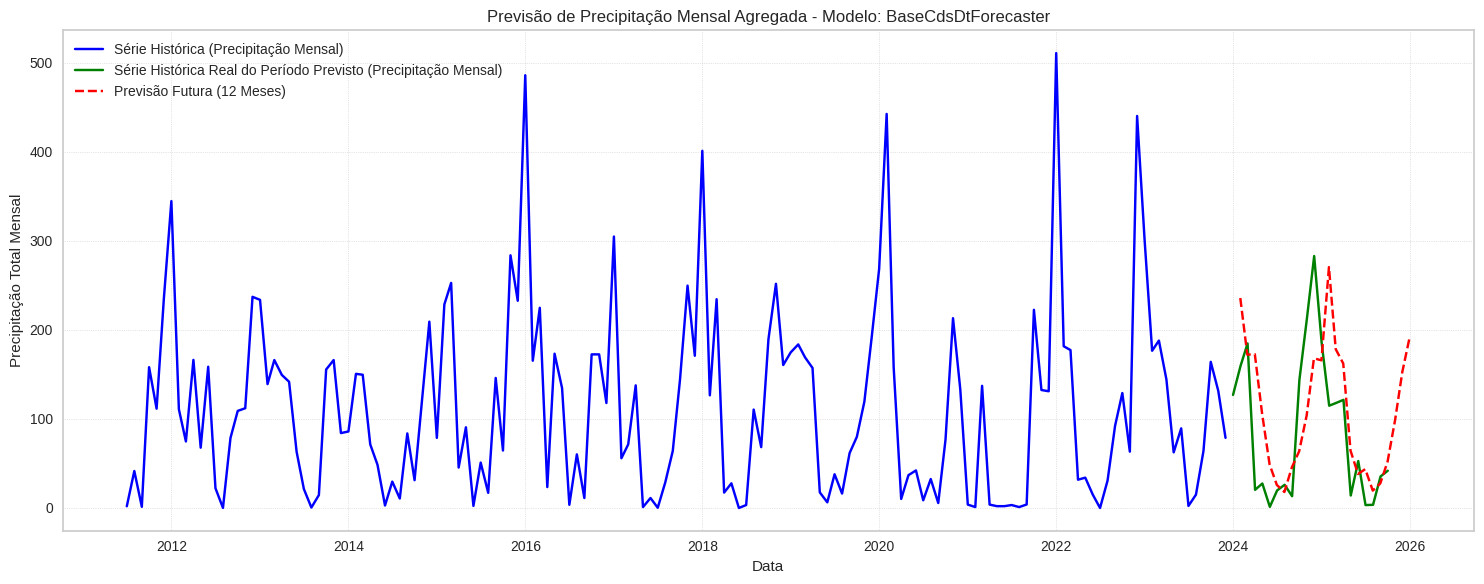


Valores da previsão (12 meses):
           y_pred
2024-01  235.7430
2024-02  172.1211
2024-03  172.7191
2024-04  106.0519
2024-05   48.8670
2024-06   25.7988
2024-07   17.9142
2024-08   45.6508
2024-09   63.6875
2024-10  103.9210
2024-11  168.0545
2024-12  165.7826
2025-01  270.4504
2025-02  178.2957
2025-03  162.2519
2025-04   64.4890
2025-05   38.1659
2025-06   43.6281
2025-07   19.5208
2025-08   27.5782
2025-09   51.9617
2025-10   98.6726
2025-11  152.8966
2025-12  192.7566


In [32]:
# --- Visualização ---
# Gerando o gráfico de previsão Mensal
plt.figure(figsize=(15, 6))

# Série histórica (Dados Reais Mensais)
plt.plot(df_modelagem.index, df_modelagem[variavel_precipitacao], label='Série Histórica (Precipitação Mensal)', color='blue')

# Previsão futura Mensal
plt.plot(df_dados_reais_futuro.index, df_dados_reais_futuro['tp_mm'], label='Série Histórica Real do Período Previsto (Precipitação Mensal)', color='green')

# Previsão futura Mensal
plt.plot(predictions_mensal.index, predictions_mensal['y_pred'], label='Previsão Futura (24 Meses)', color='red', linestyle='--')

# Configurações do Gráfico
plt.title(f'Previsão de Precipitação Mensal Agregada - Modelo: {type(best_model_mensal).__name__}')
plt.xlabel('Data')
plt.ylabel('Precipitação Total Mensal')
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# Exibindo os primeiros valores da previsão
print("\nValores da previsão (24 meses):")
print(predictions_mensal)